In [1]:
import pandas as pd
import os

# Ensure the directory for saving images exists
image_dir = 'images/pca'
os.makedirs(image_dir, exist_ok=True)

file_path = 'data/filled_df_filtered_no_duplicates.csv'
df = pd.read_csv(file_path)

# Updated list of columns to be dropped, including the additional market data columns
columns_to_drop = [
    'id','low','high','title', 'url', 'sentiment_score', 'sentiment_interpretation', 
    'author', 'timestamp_news', 'timestamp_rounded', 
    'spy_open', 'spy_high', 'spy_low', 
    'dia_open', 'dia_high', 'dia_low', 
    'gld_open', 'gld_high', 'gld_low'
]

# Drop the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# Display the first few rows of the DataFrame to confirm the columns are dropped
print(df.head())

# Display all columns of the DataFrame to confirm the drop
print(df.columns.tolist())

             timestamp    open   close      volume      sma_30        rsi  \
0  2016-01-01 00:00:00  430.35  430.61  160.179593  427.471667  56.564580   
1  2016-01-01 01:00:00  430.59  430.78   92.132315  427.600333  57.507715   
2  2016-01-01 02:00:00  430.80  430.62   93.024327  427.682000  56.182907   
3  2016-01-01 03:00:00  430.62  432.84  103.811532  427.869000  67.989018   
4  2016-01-01 04:00:00  432.74  436.12  363.875951  428.126000  78.064719   

       macd  dia_close  dia_volume  gld_close  ...  \
0  1.190551    147.323       250.0     101.46  ...   
1  1.174780    147.323       250.0     101.46  ...   
2  1.136271    147.323       250.0     101.46  ...   
3  1.270246    147.323       250.0     101.46  ...   
4  1.622389    147.323       250.0     101.46  ...   

   mobile_cellular_subscriptions_per_100_people  \
0                                     103.37025   
1                                     103.37025   
2                                     103.37025   
3       

/var/folders/jt/f0dtwp_x2w1fvk06tzwm2p200000gn/T/ipykernel_22957/2393690001.py:9: DtypeWarning: Columns (48,50,51,53,54,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [2]:

# Print the first 5 values of 'classification', 'timestamp', and 'value'
print(df[['classification', 'timestamp', 'value']].head())

  classification            timestamp  value
0            NaN  2016-01-01 00:00:00    NaN
1            NaN  2016-01-01 01:00:00    NaN
2            NaN  2016-01-01 02:00:00    NaN
3            NaN  2016-01-01 03:00:00    NaN
4            NaN  2016-01-01 04:00:00    NaN


In [3]:
import pandas as pd

# Print unique non-NaN values for 'classification'
print("Unique 'classification' values:")
print(df['classification'].dropna().unique())

# Print unique non-NaN values for 'value'
print("\nUnique 'value' values:")
print(df['value'].dropna().unique())

# Print data types for 'classification' and 'value'
print("\nData types:")
print("'classification' dtype:", df['classification'].dtype)
print("'value' dtype:", df['value'].dtype)


Unique 'classification' values:
['Fear' 'Extreme Fear' 'Neutral' 'Greed' 'Extreme Greed']

Unique 'value' values:
[30. 15. 40. 24. 11.  8. 36. 44. 54. 31. 42. 35. 55. 71. 67. 74. 63. 39.
 33. 37. 41. 38. 47. 56. 59. 32. 29. 28. 18. 12. 16. 22. 17. 19. 20. 21.
 23. 26. 25. 64. 61. 52. 62. 53. 27. 34. 43. 46. 49. 48. 14. 13. 51.  9.
 10. 65. 69. 58. 50. 57. 60. 68. 66. 76. 75. 78. 77. 70. 73. 80. 84. 83.
 82. 81. 87. 95. 92. 79. 72. 45.  5. 90. 88. 86. 89. 91. 94. 93.  7.  6.]

Data types:
'classification' dtype: object
'value' dtype: float64


In [4]:
# Define a mapping from the classification labels to numerical values
classification_mapping = {
    'Extreme Fear': -2,
    'Fear': -1,
    'Neutral': 0,
    'Greed': 1,
    'Extreme Greed': 2
}

# Apply the mapping to the 'classification' column
df['classification_numerical'] = df['classification'].map(classification_mapping)

# Display the first few rows to verify the transformation
print(df[['classification', 'classification_numerical']].head())


  classification  classification_numerical
0            NaN                       NaN
1            NaN                       NaN
2            NaN                       NaN
3            NaN                       NaN
4            NaN                       NaN


In [5]:
# Count missing values for every column
missing_values_after_feature_selection = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values for each column:")
print(missing_values_after_feature_selection)

Missing values for each column:
timestamp                                                 0
open                                                      0
close                                                     0
volume                                                    0
sma_30                                                    0
rsi                                                       0
macd                                                      0
dia_close                                                 0
dia_volume                                                0
gld_close                                                 0
gld_volume                                                0
spy_close                                                 0
spy_volume                                                0
federal_funds_rate_daily                                  0
treasury_yield_daily                                      0
cpi_monthly                                               0
durables

In [6]:
# Calculate the mean for 'classification_numerical' and 'value' columns, excluding NaN values
classification_numerical_mean = df['classification_numerical'].mean()
value_mean = df['value'].mean()

# Assign the result of fillna() directly to the columns
df['classification_numerical'] = df['classification_numerical'].fillna(classification_numerical_mean)
df['value'] = df['value'].fillna(value_mean)


In [7]:
# Count missing values for every column
missing_values_after_feature_selection = df.isnull().sum()

# Display the count of missing values for each column
print("Missing values for each column:")
print(missing_values_after_feature_selection)

Missing values for each column:
timestamp                                                 0
open                                                      0
close                                                     0
volume                                                    0
sma_30                                                    0
rsi                                                       0
macd                                                      0
dia_close                                                 0
dia_volume                                                0
gld_close                                                 0
gld_volume                                                0
spy_close                                                 0
spy_volume                                                0
federal_funds_rate_daily                                  0
treasury_yield_daily                                      0
cpi_monthly                                               0
durables

In [8]:
# Drop the 'classification' column
df = df.drop(columns=['classification'])

# Confirm the column has been dropped by printing the remaining columns
print(df.columns.tolist())


['timestamp', 'open', 'close', 'volume', 'sma_30', 'rsi', 'macd', 'dia_close', 'dia_volume', 'gld_close', 'gld_volume', 'spy_close', 'spy_volume', 'federal_funds_rate_daily', 'treasury_yield_daily', 'cpi_monthly', 'durables_monthly', 'nonfarm_payroll_monthly', 'real_gdp_per_capita_quarterly', 'real_gdp_quarterly', 'retail_sales_monthly', 'unemployment_monthly', 'central_bank_policy_rate_prcnt', 'domestic_credit_gdp', 'foreign_direct_investment_value', 'gdp_growth_annual_prcnt', 'inflation_rate_value', 'individuals_using_the_internet_prcnt_of_population', 'mobile_cellular_subscriptions_per_100_people', 'personal_remittances_received_prcnt_of_gdp', 'stock_market_index_value', 'tariffs_value', 'total_public_debt_gdp_value', 'trade_balance_value', 'trade_in_services_value', 'unemployment_rate_value', 'value', 'classification_numerical']


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Updated list of features for PCA, including 'value' and 'classification_numerical'
features = ['open', 'volume', 'sma_30', 'rsi', 'macd', 
            'dia_close', 'dia_volume', 'gld_close', 'gld_volume', 
            'spy_close', 'spy_volume', 'federal_funds_rate_daily', 
            'treasury_yield_daily', 'cpi_monthly', 'durables_monthly', 
            'nonfarm_payroll_monthly', 'real_gdp_per_capita_quarterly', 
            'real_gdp_quarterly', 'retail_sales_monthly', 'unemployment_monthly', 
            'central_bank_policy_rate_prcnt', 'domestic_credit_gdp', 
            'foreign_direct_investment_value', 'gdp_growth_annual_prcnt', 
            'inflation_rate_value', 'individuals_using_the_internet_prcnt_of_population', 
            'mobile_cellular_subscriptions_per_100_people', 
            'personal_remittances_received_prcnt_of_gdp', 'stock_market_index_value', 
            'tariffs_value', 'total_public_debt_gdp_value', 'trade_balance_value', 
            'trade_in_services_value', 'unemployment_rate_value', 
            'classification_numerical', 'value']  # Including 'value'

# Assuming 'df' is our DataFrame
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Applying PCA
pca = PCA(n_components=0.95)  # For example, to keep 95% of the variance
principalComponents = pca.fit_transform(x)

# Transform PCA components back to a DataFrame
principalDf = pd.DataFrame(data=principalComponents)

# Print the explained variance ratio
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

Explained variance ratio:
[0.47970958 0.13820242 0.07110802 0.05717862 0.05217148 0.04281889
 0.03685342 0.02630032 0.02377258 0.0155582  0.01416302]


In [10]:
# Get the PCA components (loadings) for each feature
loadings = pca.components_

# Create a DataFrame with the loadings and the feature names for easier interpretation
loadings_df = pd.DataFrame(data=loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=features)

latex_dir = 'tables/pca'
os.makedirs(latex_dir, exist_ok=True)

# Export the loadings DataFrame to a LaTeX table
loadings_df.to_latex(os.path.join(latex_dir, 'pca_loadings.tex'))

print(loadings_df)


                                                         PC1       PC2  \
open                                               -0.206398  0.072286   
volume                                             -0.039602  0.023947   
sma_30                                             -0.206466  0.071682   
rsi                                                 0.013590  0.025166   
macd                                               -0.001292  0.026808   
dia_close                                          -0.232208  0.019430   
dia_volume                                          0.005267  0.010258   
gld_close                                          -0.210740  0.171181   
gld_volume                                          0.003656  0.013805   
spy_close                                          -0.235002  0.041329   
spy_volume                                          0.002390  0.002487   
federal_funds_rate_daily                           -0.110620 -0.249879   
treasury_yield_daily                  

In [11]:
import pandas as pd
from sklearn.decomposition import PCA

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Loop through each principal component in the DataFrame
for i, column in enumerate(loadings_df.columns):
    # Print the principal component name and explained variance
    print(f"{column} - Variance explained: {explained_variance_ratio[i]*100:.2f}%")
    # Sort the loadings for this principal component in descending order of their absolute values
    top5 = loadings_df[column].abs().sort_values(ascending=False).head(5)
    # Print the top 5 variables and their loadings
    print(top5, "\n")


PC1 - Variance explained: 47.97%
trade_balance_value                           0.235604
spy_close                                     0.235002
dia_close                                     0.232208
personal_remittances_received_prcnt_of_gdp    0.227596
cpi_monthly                                   0.227418
Name: PC1, dtype: float64 

PC2 - Variance explained: 13.82%
unemployment_rate_value        0.385344
unemployment_monthly           0.377993
treasury_yield_daily           0.334802
nonfarm_payroll_monthly        0.314842
total_public_debt_gdp_value    0.260649
Name: PC2, dtype: float64 

PC3 - Variance explained: 7.11%
spy_volume                  0.583559
dia_volume                  0.572394
gld_volume                  0.520510
value                       0.116373
classification_numerical    0.113863
Name: PC3, dtype: float64 

PC4 - Variance explained: 5.72%
classification_numerical    0.581969
value                       0.581220
tariffs_value               0.261090
macd           

In [12]:
# Create a directory for LaTeX tables if it doesn't exist
latex_dir = 'latex/tables'
os.makedirs(latex_dir, exist_ok=True)

# Create a LaTeX table for the explained variance and top 5 loadings for each principal component
with open(os.path.join(latex_dir, 'explained_variance_and_loadings.tex'), 'w') as f:
    for i, column in enumerate(loadings_df.columns[:5]):
        f.write(f"\\section*{{{column} - Variance explained: {explained_variance_ratio[i]*100:.2f}\\%}}\n")
        f.write("\\begin{tabular}{lr}\n")
        f.write("\\toprule\n")
        f.write("Variable & Loading \\\\\n")
        f.write("\\midrule\n")
        top5 = loadings_df[column].abs().sort_values(ascending=False).head(5)
        for var, loading in top5.items():
            var_escaped = var.replace('_', '\\_')
            f.write(f"{var_escaped} & {loading:.4f} \\\\\n")
        f.write("\\bottomrule\n")
        f.write("\\end{tabular}\n\n")

print("Explained variance and top loadings table saved to LaTeX.")


Explained variance and top loadings table saved to LaTeX.


/var/folders/jt/f0dtwp_x2w1fvk06tzwm2p200000gn/T/ipykernel_22957/2097204024.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=principalDf[0], y=principalDf[1],
/var/folders/jt/f0dtwp_x2w1fvk06tzwm2p200000gn/T/ipykernel_22957/2097204024.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Target')


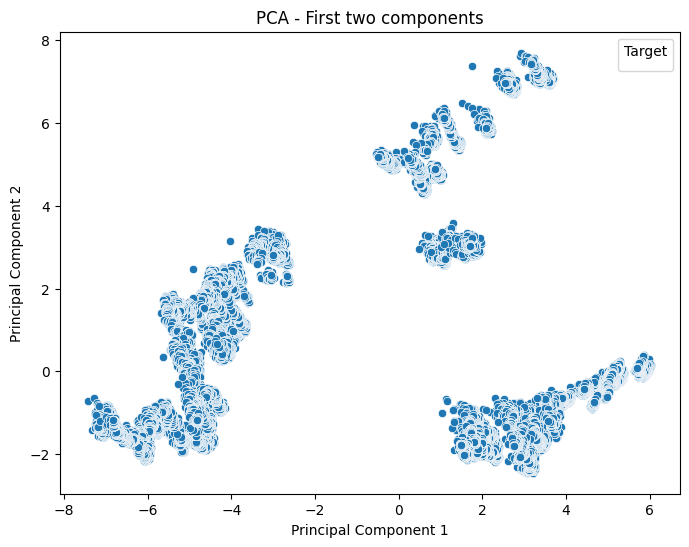

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2D Scatter plot for the first two PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=principalDf[0], y=principalDf[1], 
                palette=sns.color_palette("hsv", 10),
                legend='full')


plt.title('PCA - First two components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.savefig(os.path.join(image_dir, 'dailyPCAfirst2.png'))
plt.show()


In [14]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Assuming 'principalDf' is our DataFrame containing the PCA components
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting each point without specific coloring for categories
# Here we're not using a categorical variable for coloring, so all points will be the same color
ax.scatter(xs=principalDf[0], ys=principalDf[1], zs=principalDf[2], cmap='viridis')

ax.set_title('PCA - First three components')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Save the plot as an image
plt.savefig(os.path.join(image_dir, 'pca_3d_plot.png'))
plt.close()


/var/folders/jt/f0dtwp_x2w1fvk06tzwm2p200000gn/T/ipykernel_22957/158482225.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(xs=principalDf[0], ys=principalDf[1], zs=principalDf[2], cmap='viridis')


## Aggregation for Daily Data

In [15]:
aggregation_dict = {
    'timestamp': 'first',  # Placeholder; will be dropped before aggregation
    'open': 'first',  # First open price of the day
    'close': 'last',  # Last close price of the day
    'volume': 'sum',  # Sum of volumes for the day
    'sma_30': 'mean',  # Simple Moving Average over 30 periods
    'rsi': 'mean',  # Relative Strength Index
    'macd': 'mean',  # Moving Average Convergence Divergence
    'dia_close': 'last',  # Dow Jones Industrial Average close price
    'dia_volume': 'sum',  # Dow Jones Industrial Average volume
    'gld_close': 'last',  # Gold close price
    'gld_volume': 'sum',  # Gold volume
    'spy_close': 'last',  # S&P 500 close price
    'spy_volume': 'sum',  # S&P 500 volume
    'federal_funds_rate_daily': 'mean',  # Federal funds rate
    'treasury_yield_daily': 'mean',  # Treasury yield
    'cpi_monthly': 'last',  # Consumer Price Index
    'durables_monthly': 'last',  # Durable goods orders
    'nonfarm_payroll_monthly': 'last',  # Nonfarm payroll
    'real_gdp_per_capita_quarterly': 'last',  # Real GDP per capita
    'real_gdp_quarterly': 'last',  # Real GDP
    'retail_sales_monthly': 'last',  # Retail sales
    'unemployment_monthly': 'last',  # Unemployment rate
    'central_bank_policy_rate_prcnt': 'mean',  # Central bank policy rate
    'domestic_credit_gdp': 'mean',  # Domestic credit to GDP
    'foreign_direct_investment_value': 'mean',  # Foreign direct investment
    'gdp_growth_annual_prcnt': 'mean',  # GDP growth rate
    'inflation_rate_value': 'mean',  # Inflation rate
    'individuals_using_the_internet_prcnt_of_population': 'mean',  # Internet usage
    'mobile_cellular_subscriptions_per_100_people': 'mean',  # Mobile subscriptions
    'personal_remittances_received_prcnt_of_gdp': 'mean',  # Personal remittances
    'stock_market_index_value': 'last',  # Stock market index
    'tariffs_value': 'mean',  # Tariffs
    'total_public_debt_gdp_value': 'mean',  # Public debt to GDP
    'trade_balance_value': 'mean',  # Trade balance
    'trade_in_services_value': 'mean',  # Trade in services
    'unemployment_rate_value': 'mean',  # Unemployment rate
    'value': 'mean',  # Generic value
    'classification': 'mean',  # Classification
    'classification_numerical': 'mean'  # Classification numerical
}


In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import os

# Read the dataset
file_path = 'data/filled_df_filtered_no_duplicates.csv'
df = pd.read_csv(file_path, low_memory=False)

# Check if the timestamp column exists and convert it to datetime
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date  # Extract date (without time)
else:
    print("Timestamp column not found. Please check the DataFrame.")

# Map classification labels to numerical values if the column exists
if 'classification' in df.columns:
    classification_mapping = {
        'Extreme Fear': -2,
        'Fear': -1,
        'Neutral': 0,
        'Greed': 1,
        'Extreme Greed': 2
    }
    df['classification_numerical'] = df['classification'].map(classification_mapping)
else:
    print("Classification column not found. Please check the DataFrame.")

# Drop the original 'timestamp' column (and others we've decided to exclude)
df = df.drop(['timestamp', 'high', 'low'], axis=1, errors='ignore')  # Use errors='ignore' to avoid issues if columns don't exist

# Ensure the dictionary only includes columns that exist in the dataframe
aggregation_dict = {k: v for k, v in aggregation_dict.items() if k in df.columns}

# Separate numeric and non-numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()

# Define separate aggregation dictionaries for numeric and non-numeric columns
numeric_aggregation_dict = {col: aggregation_dict[col] for col in numeric_cols if col in aggregation_dict}
non_numeric_aggregation_dict = {col: 'first' for col in non_numeric_cols if col in aggregation_dict}

# Combine both dictionaries
combined_aggregation_dict = {**numeric_aggregation_dict, **non_numeric_aggregation_dict}

# Aggregate data by date using the combined aggregation dictionary
df_daily = df.groupby('date').agg(combined_aggregation_dict).reset_index()

# Define 'X' and 'y'
X = df_daily.drop(['close'], axis=1)  # Assuming all other columns are features
y = df_daily['close']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Check if the target directory exists, create it if not
output_dir = "daily_data"
os.makedirs(output_dir, exist_ok=True)  # This will create the directory if it doesn't exist

# Save the datasets to CSV files
X_train.to_csv(os.path.join(output_dir, "X_train.csv"), index=False)
X_test.to_csv(os.path.join(output_dir, "X_test.csv"), index=False)
y_train.to_csv(os.path.join(output_dir, "y_train.csv"), index=False)
y_test.to_csv(os.path.join(output_dir, "y_test.csv"), index=False)

# Load the datasets to print their shapes and summarize them
X_train = pd.read_csv("daily_data/X_train.csv")
X_test = pd.read_csv("daily_data/X_test.csv")
y_train = pd.read_csv("daily_data/y_train.csv")
y_test = pd.read_csv("daily_data/y_test.csv")

# Print the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# Summarize the datasets
print("X_train summary:")
print(X_train.describe(include='all'))
print("X_test summary:")
print(X_test.describe(include='all'))
print("y_train summary:")
print(y_train.describe(include='all'))
print("y_test summary:")
print(y_test.describe(include='all'))


X_train shape: (2367, 38)
X_test shape: (592, 38)
y_train shape: (2367, 1)
y_test shape: (592, 1)
X_train summary:
              date          open         volume        sma_30          rsi  \
count         2367   2367.000000    2367.000000   2367.000000  2367.000000   
unique        2367           NaN            NaN           NaN          NaN   
top     2016-01-01           NaN            NaN           NaN          NaN   
freq             1           NaN            NaN           NaN          NaN   
mean           NaN  14790.731597   14172.150400  14780.600489    51.642047   
std            NaN  17198.582821   11616.033355  17190.009199    10.793692   
min            NaN    357.590000     683.798071    372.011778    16.805849   
25%            NaN   3354.630000    6663.324125   3369.563208    44.573832   
50%            NaN   8001.690000   10936.678353   8018.060472    51.194170   
75%            NaN  17029.505000   17899.008445  16883.100226    58.745499   
max            NaN  67554.1

In [17]:
# Save the summaries to LaTeX files
with open(os.path.join(latex_dir, 'dataset_shapes.tex'), 'w') as f:
    f.write(f"\\begin{{tabular}}{{|l|r|}}\n")
    f.write(f"\\hline\n")
    f.write(f"\\textbf{{Dataset}} & \\textbf{{Shape}} \\\\\n")
    f.write(f"\\hline\n")
    f.write(f"X\\_train & {X_train.shape} \\\\\n")
    f.write(f"X\\_test & {X_test.shape} \\\\\n")
    f.write(f"y\\_train & {y_train.shape} \\\\\n")
    f.write(f"y\\_test & {y_test.shape} \\\\\n")
    f.write(f"\\hline\n")
    f.write(f"\\end{{tabular}}\n")

# Save the summaries of each dataset to separate LaTeX files
X_train.describe(include='all').to_latex(os.path.join(latex_dir, 'X_train_summary.tex'))
X_test.describe(include='all').to_latex(os.path.join(latex_dir, 'X_test_summary.tex'))
y_train.describe(include='all').to_latex(os.path.join(latex_dir, 'y_train_summary.tex'))
y_test.describe(include='all').to_latex(os.path.join(latex_dir, 'y_test_summary.tex'))

print("Dataset shapes and summaries saved to LaTeX.")


Dataset shapes and summaries saved to LaTeX.
